---
title: "Iris Neural Network Training"
author: "Laura Vairus"
date: "06-21-2023"
---

In [301]:
# importing packages

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [302]:

# defining NN
"""
class Net(nn.Module):

    def __init__(self, inp, hl1, hl2, hl3, out):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(inp, hl1) 
        self.fc2 = nn.Linear(hl1, hl2)
        self.fc4 = nn.Linear(hl2, hl3)
        self.fc5 = nn.Linear(hl3, out)
        self.s = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        x = self.s(x)
        return x
"""

class Net(nn.Module):
    def __init__(self, layer_sizes):
        super(Net, self).__init__()
        self.layers = nn.ModuleList()
        self.num_layers = len(layer_sizes) - 1

        # Create hidden layers
        for i in range(self.num_layers):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
        
        # output layer
        self.layers.append(nn.Sigmoid())

    def forward(self, x):
        for i in range(self.num_layers):
            x = torch.relu(self.layers[i](x))

        return x


In [303]:
layer_sizes = [4, 30, 20, 10, 3]  # Input size, hidden layer sizes, output size
net = Net(layer_sizes)
net

Net(
  (layers): ModuleList(
    (0): Linear(in_features=4, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=3, bias=True)
    (4): Sigmoid()
  )
)

In [304]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [305]:
# defining dataset

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        L = self.x.shape[0]
        return L

    def __getitem__(self, i):
        return (self.x[i, :], self.y[i])


In [306]:
# getting data

iris = datasets.load_iris() # all data

data = torch.from_numpy(iris.data).float() # splitting into data tensors (X)
target = torch.from_numpy(iris.target).long() # and target tensors (Y)

# splitting dataset into training and testing groups
trainX, testX, trainY, testY = train_test_split(data, target, test_size=0.1, random_state=42)
# X is data/attributes
# Y is targets/labels

# making data a Dataset object
trainDataset = MyDataset(trainX, trainY)
testDataset = MyDataset(testX, testY)

# putting Dataset into Loader
trainLoader = DataLoader(trainDataset, batch_size=8, shuffle=True)
testLoader = DataLoader(testDataset, batch_size=4, shuffle=True)


In [307]:
# training NN

nepochs = 100
epoch_loss = []

for epoch in range(nepochs):
    iter_loss = 0
    for i, (bX, bY) in enumerate(trainLoader):
        optimizer.zero_grad()   # zero the gradient buffers
        output = net(bX)
        loss = criterion(output, bY)
        loss.backward()
        optimizer.step()
        #print(f'iteration {i}: loss {loss.item()}')
        iter_loss += loss.item()
    epoch_loss.append(iter_loss/(i+1))
    # print(f'epoch {epoch}: loss {iter_loss/(i+1)}')

    # print(loss)


In [308]:
epoch_loss

[1.089932595982271,
 1.0780915232265698,
 1.0698856536079855,
 1.0620966939365162,
 1.051463221802431,
 1.0407792960896212,
 1.0263941287994385,
 1.006874662988326,
 0.9818673975327435,
 0.9543773672159981,
 0.9278924991102779,
 0.892082112676957,
 0.8528847378842971,
 0.8151910129715415,
 0.7762638295398039,
 0.7339987334083108,
 0.6915121253798989,
 0.6529985280597911,
 0.6120010228718028,
 0.577684718019822,
 0.537588391233893,
 0.5076155101551729,
 0.48230401382726784,
 0.45989446254337535,
 0.44066135672961965,
 0.4121406087104012,
 0.3928568380720475,
 0.3732422344824847,
 0.3446122083593817,
 0.33735772266107444,
 0.3142062723636627,
 0.3080035522580147,
 0.2785126128617455,
 0.2714738609159694,
 0.25107884670005126,
 0.2379030300413861,
 0.22928375860347466,
 0.2026286813266137,
 0.2178823264206157,
 0.19517485665924408,
 0.20197849501581752,
 0.1951888777753886,
 0.19636180690106222,
 0.19281140714883804,
 0.16958910445956624,
 0.17367594732957728,
 0.15995553683708696,
 0.142

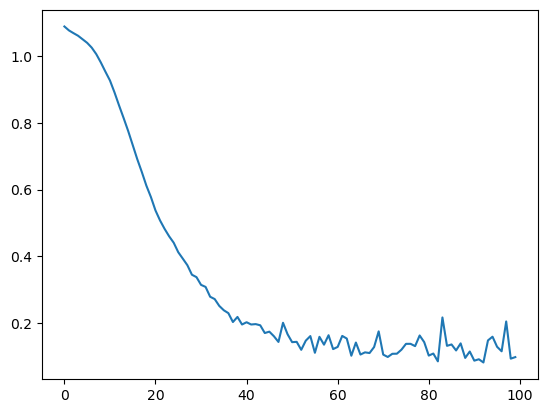

In [309]:
import matplotlib.pyplot as plt

plt.plot(epoch_loss)

In [310]:
# testing NN

print("testing")
optimizer.zero_grad()
output = net(testX)
print(testX.shape)
loss = criterion(output, testY)
print(loss)
# print(output)

testing
torch.Size([15, 4])
tensor(0.1146, grad_fn=<NllLossBackward0>)


In [311]:
# analyzing and printing results

preds = []
for row in output:
    if row.max() == row[0]:
        preds.append(0)
    elif row.max() == row[1]:
        preds.append(1)
    else:
        preds.append(2)
tPreds = torch.tensor(preds).view(15,1)
tTargets = testY.view(15,1)

result = torch.cat([tPreds,tTargets], dim=1)
print(result)
correct = 0
for row in result:
    if row[0] == row[1]:
        correct += 1

print(correct)


tensor([[1, 1],
        [0, 0],
        [2, 2],
        [1, 1],
        [1, 1],
        [0, 0],
        [1, 1],
        [2, 2],
        [2, 1],
        [1, 1],
        [2, 2],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])
14
